Trace names are client_id, sample_path, label_name, label_id
2800
dict_values([299, 151, 335, 157, 181, 354, 180, 179, 126, 161, 351, 159, 165, 169, 301, 143, 148, 333, 375, 170, 152, 308, 277, 171, 142, 173, 146, 332, 259, 292, 181, 151, 159, 50, 169, 157, 176, 168, 168, 181, 246, 47, 177, 413, 230, 221, 121, 155, 365, 179, 159, 167, 174, 167, 178, 171, 152, 242, 166, 175, 165, 180, 344, 414, 19, 173, 423, 164, 404, 305, 135, 176, 279, 179, 246, 177, 323, 248, 173, 172, 31, 176, 164, 173, 228, 271, 169, 404, 437, 273, 274, 157, 177, 169, 378, 141, 207, 176, 172, 151, 164, 163, 315, 173, 177, 311, 376, 287, 185, 96, 238, 379, 437, 222, 168, 408, 167, 353, 383, 176, 150, 393, 175, 176, 183, 145, 391, 374, 321, 331, 333, 178, 158, 177, 344, 183, 176, 149, 178, 342, 267, 325, 170, 168, 127, 161, 249, 182, 164, 269, 170, 117, 150, 367, 257, 244, 175, 149, 169, 164, 179, 316, 112, 169, 169, 132, 160, 169, 174, 176, 157, 330, 175, 243, 259, 169, 212, 164, 131, 378, 275, 154, 178, 179, 172, 1

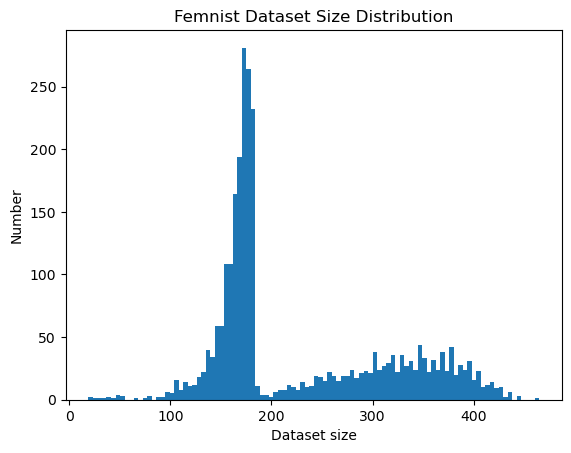

In [6]:
import csv
import matplotlib.pyplot as plt

unique_client_ids = {}
data_map_file = '../datasets/femnist/client_data_mapping/train.csv'
with open(data_map_file) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    read_first = True
    sample_id = 0

    client_id = 0
    size_dict = {}

    for row in csv_reader:
        if read_first:
            print(f'Trace names are {", ".join(row)}')
            read_first = False
        else:
            idx = row[0]
            if idx not in unique_client_ids:
                unique_client_ids[idx] = client_id
                size_dict[client_id] = 0
                client_id += 1
            size_dict[unique_client_ids[idx]] += 1
            

print(len(size_dict))
print(size_dict.values())
plt.hist(size_dict.values(), bins=100)
plt.xlabel('Dataset size')
plt.ylabel('Number')
plt.title('Femnist Dataset Size Distribution')
plt.show()

In [5]:
import pickle
file_path = '../datasets/device_info/client_dataset_size'

# Pickle and dump the data to the file
with open(file_path, 'wb') as file:
    pickle.dump(size_dict, file)

500000


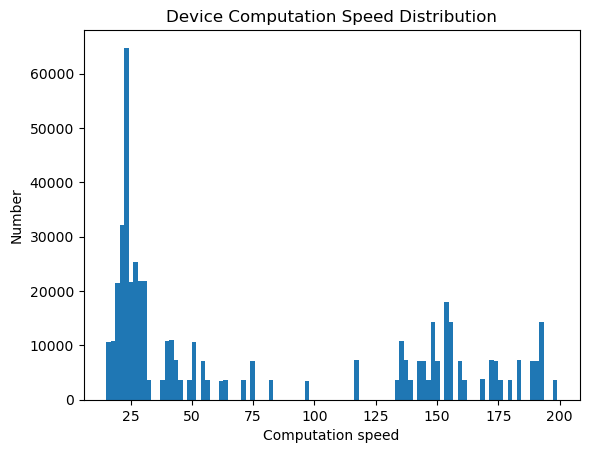

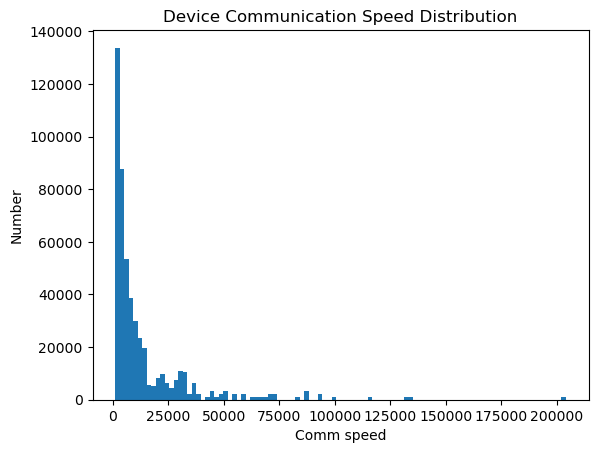

In [3]:
import pickle
import matplotlib.pyplot as plt

client_speed_dict = None
with open('../datasets/device_info/client_device_capacity', 'rb') as client_file:
    client_speed_dict = pickle.load(client_file)

speed_list = []
comm_list = []
for id, value in client_speed_dict.items():
    speed_list.append(value["computation"])
    comm_list.append(value["communication"])

print(len(client_speed_dict))

plt.hist(speed_list, bins=100)
plt.xlabel('Computation speed')
plt.ylabel('Number')
plt.title('Device Computation Speed Distribution')
plt.show()

plt.hist(comm_list, bins=100)
plt.xlabel('Comm speed')
plt.ylabel('Number')
plt.title('Device Communication Speed Distribution')
plt.show()


In [1]:
import pickle
import matplotlib.pyplot as plt

client_avail = None
with open('../datasets/device_info/client_behave_trace', 'rb') as client_file:
    client_avail = pickle.load(client_file)


In [7]:
print(client_avail[4]["model"])
print(len(client_avail))

SM-A207F
107749


In [4]:
id_list = [ i + 1 for i in range(10)]
val_list = [client_avail[i] for i in id_list]
sum = 0
num = 0
for val in val_list:
    active_list = val["active"]
    inactive_list = val["inactive"]
    for x in range(len(active_list)):
        sum += inactive_list[x] - active_list[x]
        num += 1

print(sum / num)

18876.267647058823


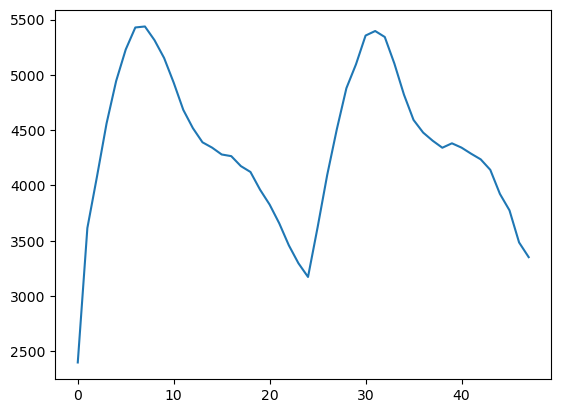

In [9]:
device = {i: client_avail[i+1] for i in range(10000)}

avail_cnt = [0 for _ in range(48)]
for i in range(len(avail_cnt)):
    for id, val in device.items():
        inactive_list = val["inactive"]
        active_list = val["active"]
        for x in range(len(active_list)):
            if i * 60 * 60>= active_list[x] and i * 60 * 60< inactive_list[x]:
                avail_cnt[i] += 1

plt.plot(avail_cnt)
plt.show()

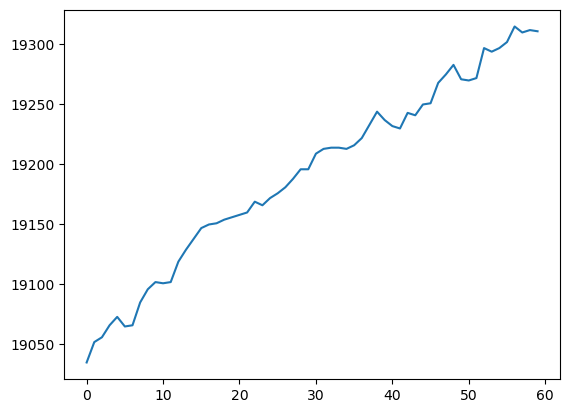

In [21]:
avail_cnt = [0 for _ in range(60)]
for i in range(len(avail_cnt)):
    for id, val in client_avail.items():
        inactive_list = val["inactive"]
        active_list = val["active"]
        for x in range(len(active_list)):
            if i + 60 >= active_list[x] and i + 60 < inactive_list[x]:
                avail_cnt[i] += 1

plt.plot(avail_cnt)
plt.show()